<a href="https://colab.research.google.com/github/rajeevan094/machinelearnig/blob/main/expno3/scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("StudentsPerformance.csv")

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df['Final_Score'] = df[['math score',
                        'reading score',
                        'writing score']].mean(axis=1)


In [4]:
le = LabelEncoder()

df['parental_education_encoded'] = le.fit_transform(
    df['parental level of education']
)

df['test_prep_encoded'] = le.fit_transform(
    df['test preparation course']
)


In [5]:
features = ['parental_education_encoded',
            'test_prep_encoded']

# If dataset includes study hours, attendance, sleep:
# Add them if available:
# features += ['study_hours', 'attendance', 'sleep_hours']

X = df[features]
y = df['Final_Score']


In [6]:
print(df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Final_Score                    0
parental_education_encoded     0
test_prep_encoded              0
dtype: int64


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


In [11]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 207.91715060774996


In [12]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 14.419332529897144


In [13]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.030085923188504338


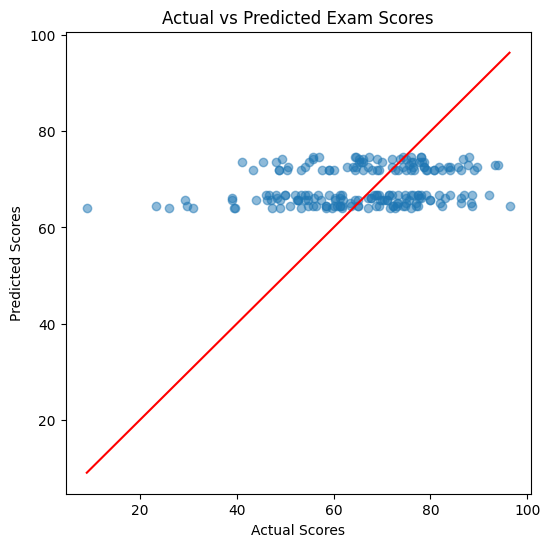

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()


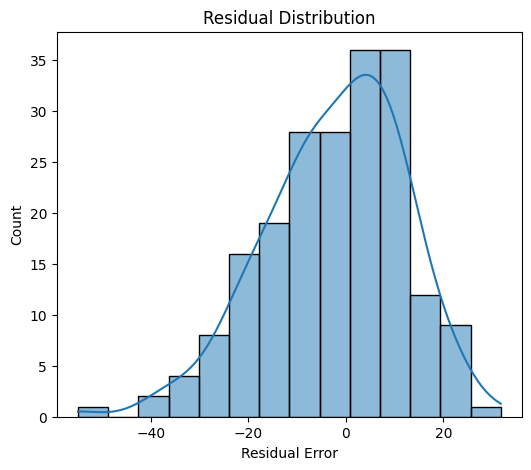

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(6,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual Error")
plt.show()


In [16]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

coef_df.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
0,parental_education_encoded,-1.006718
1,test_prep_encoded,-3.840039


In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


ValueError: could not convert string to float: 'female'

In [18]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge R²: 0.030111959480189632


In [19]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso R²:", r2_score(y_test, y_pred_lasso))


Lasso R²: 0.03006288216653019
